# Data Correlation:
**in this note book we have used data from yahoo finance of S&P feature and this companies:**

 1) Lululemon Athletica- LULU
 2) Marvell Technology Group - MRVL 
 3) Invitation Homes - INVH 
 4) Liberty Broadband - LBRD.A
 5) Snap - SNAP 
 6) Blackstone - BX 
 7) Veeva - VEEV
 
 and perform correlation anlyasis between it`s **close attribute** during the period from **5/3/2017 until 31/3/2020**

In [1]:
#pakages required
pip install fix_yahoo_finance

In [2]:
pip install pandas-datareader

In [3]:
pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=9ba79bb0d7ad676cd3d1b570ac141092adeff761f712ecaece64208e8f88d060
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [4]:
import datetime as dt
import os
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

style.use('ggplot')
yf.pdr_override



/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


<function yfinance.pdr_override>

In [0]:
companies = ['LULU','MRVL','INVH','LBRDA','SNAP','BX','VEEV']
def get_data_from_yahoo():
    if not os.path.exists('stock_dfs'):
        #to pervent from creating new directory each time i run this function
        os.makedirs('stock_dfs')
    #get data to each company
    for company in companies:
      df = pdr.get_data_yahoo(company, start="2000-01-01", end="2020-03-31")
      df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
      df.to_csv('stock_dfs/{}.csv'.format(company))

get_data_from_yahoo()

In [0]:
#get s&p yahoo feature from github link
url = 'https://raw.githubusercontent.com/AhmedElgabryi/yahoosnp/master/snp.csv'
df = pd.read_csv(url)

In [0]:
#from google.colab import drive
#drive.mount('/content/drive')

#df = pd.read_csv('/content/drive/My Drive/snp.csv')


In [0]:
#drop any row that has empty cell
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
df.to_csv('stock_dfs/SNP.csv')

In [8]:
#add snp feature to the companies list
companies = ['SNP'] + companies
print(companies)

['SNP', 'LULU', 'MRVL', 'INVH', 'LBRDA', 'SNAP', 'BX', 'VEEV']


In [9]:
#compine the adj close from all companies together to correlate between them
def compile_data():

    main_df = pd.DataFrame()

    for company in companies:
        df = pd.read_csv('/content/stock_dfs/{}.csv'.format(company))
        df.set_index('Date', inplace = True)
        #drop this unneeded feature
        df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], 1, inplace=True)
        df.rename(columns = {'Close': company}, inplace = True)

        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='inner')

    #drop unnamed column whice come automitacly with join function
    main_df.drop(['Unnamed: 0'], 1, inplace=True)
    print (main_df.head())
    main_df.to_csv('All_closing.csv')

compile_data()

                    SNP       LULU       MRVL  ...       SNAP         BX       VEEV
Date                                           ...                                 
2017-03-02  2381.919922  66.529999  15.850000  ...  24.480000  29.680000  44.000000
2017-03-03  2383.120117  65.699997  16.090000  ...  27.090000  29.660000  44.169998
2017-03-06  2375.310059  64.930000  16.030001  ...  23.770000  29.520000  44.049999
2017-03-07  2368.389893  65.139999  15.940000  ...  21.440001  29.389999  44.099998
2017-03-08  2362.979980  66.250000  15.840000  ...  22.809999  29.100000  44.250000

[5 rows x 8 columns]


In [0]:
data = pd.read_csv('All_closing.csv')

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

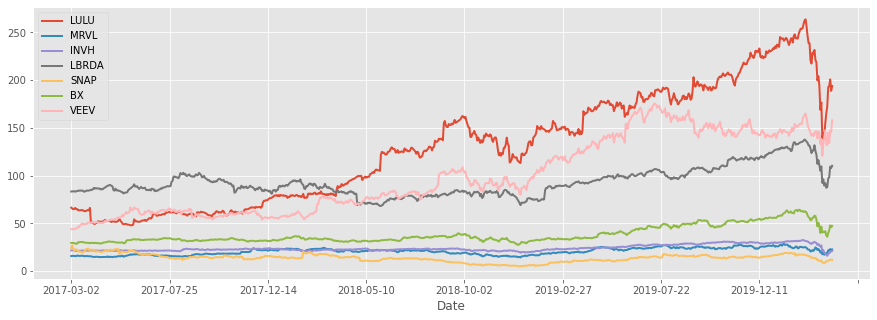

In [12]:
#drow the data throw time
#it`s apper SNAP company is the only one decrease
data.plot.line(x='Date',y=['LULU','MRVL','INVH','LBRDA','SNAP','BX','VEEV'],figsize=(15,5),lw=2)

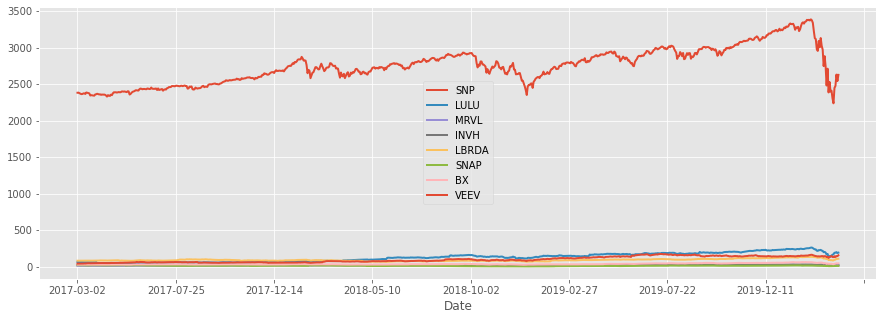

In [13]:
#add SNP to figure
data.plot.line(x='Date',y=['SNP','LULU','MRVL','INVH','LBRDA','SNAP','BX','VEEV'],figsize=(15,5),lw=2)

In [14]:
#calculate correlation matrix
corr =data.corr()
print(corr)

            SNP      LULU      MRVL  ...      SNAP        BX      VEEV
SNP    1.000000  0.891585  0.830396  ... -0.098581  0.850721  0.786851
LULU   0.891585  1.000000  0.688345  ... -0.217051  0.862033  0.930529
MRVL   0.830396  0.688345  1.000000  ...  0.148205  0.745380  0.679398
INVH   0.839819  0.801295  0.772813  ...  0.217401  0.920942  0.782466
LBRDA  0.664575  0.663831  0.598736  ...  0.316262  0.887053  0.649169
SNAP  -0.098581 -0.217051  0.148205  ...  1.000000  0.173187 -0.162759
BX     0.850721  0.862033  0.745380  ...  0.173187  1.000000  0.812134
VEEV   0.786851  0.930529  0.679398  ... -0.162759  0.812134  1.000000

[8 rows x 8 columns]


In [15]:
#correlation between snp and the seven companies
corr.loc[['SNP'],['SNP','LULU','MRVL','INVH','LBRDA','SNAP','BX',"VEEV"]]

,SNP,LULU,MRVL,INVH,LBRDA,SNAP,BX,VEEV
SNP,1.0,0.891585,0.830396,0.839819,0.664575,-0.098581,0.850721,0.786851


In [16]:
corr.loc[['SNP'],['LULU','MRVL','INVH','LBRDA','SNAP','BX',"VEEV"]]

,LULU,MRVL,INVH,LBRDA,SNAP,BX,VEEV
SNP,0.891585,0.830396,0.839819,0.664575,-0.098581,0.850721,0.786851


in the above cell`s it is apper that all companies correlate postively with SNP exept SNAP company whiche correlate negatively with SNP

            SNP      LULU      MRVL  ...      SNAP        BX      VEEV
SNP    1.000000  0.891585  0.830396  ... -0.098581  0.850721  0.786851
LULU   0.891585  1.000000  0.688345  ... -0.217051  0.862033  0.930529
MRVL   0.830396  0.688345  1.000000  ...  0.148205  0.745380  0.679398
INVH   0.839819  0.801295  0.772813  ...  0.217401  0.920942  0.782466
LBRDA  0.664575  0.663831  0.598736  ...  0.316262  0.887053  0.649169
SNAP  -0.098581 -0.217051  0.148205  ...  1.000000  0.173187 -0.162759
BX     0.850721  0.862033  0.745380  ...  0.173187  1.000000  0.812134
VEEV   0.786851  0.930529  0.679398  ... -0.162759  0.812134  1.000000

[8 rows x 8 columns]


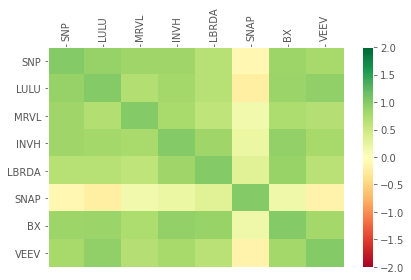

,SNP,LULU,MRVL,INVH,LBRDA,SNAP,BX,VEEV
SNP,1.000000,0.891585,0.830396,0.839819,0.664575,-0.098581,0.850721,0.786851
LULU,0.891585,1.000000,0.688345,0.801295,0.663831,-0.217051,0.862033,0.930529
MRVL,0.830396,0.688345,1.000000,0.772813,0.598736,0.148205,0.745380,0.679398
INVH,0.839819,0.801295,0.772813,1.000000,0.842105,0.217401,0.920942,0.782466
LBRDA,0.664575,0.663831,0.598736,0.842105,1.000000,0.316262,0.887053,0.649169
SNAP,-0.098581,-0.217051,0.148205,0.217401,0.316262,1.000000,0.173187,-0.162759
BX,0.850721,0.862033,0.745380,0.920942,0.887053,0.173187,1.000000,0.812134
VEEV,0.786851,0.930529,0.679398,0.782466,0.649169,-0.162759,0.812134,1.000000


In [17]:
#visualize correlation matrix
def visualize_data():
    df = pd.read_csv('All_closing.csv')
    df_corr = df.corr()

    print (df_corr)
    data = df_corr.values # inner value of the dataframe, no index, no header
    fig = plt.figure() # create a figure object
    ax = fig.add_subplot(1,1,1) # create an axes object in the figure,
    # number of rows, columns, and the ID of the subplot, between 1 and the number of columns times the number of rows.

    heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn) #plot colour cmap = from Red to Yello to Green
    fig.colorbar(heatmap) # legend


    # put the major ticks at the middle of each cell
    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
    # set_xticks = Set the x ticks with list of ticks
    # arange = form an array
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)

    # want a more natural, table-like display
    ax.invert_yaxis() # top of matplotlib graph
    ax.xaxis.tick_top() # move xaxis tick to the top

    # set the labels
    column_labels = df_corr.columns
    row_labels = df_corr.index

    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation=90) # rotating the label
    heatmap.set_clim(-2, 2) # limit of color
    plt.tight_layout() # clean things out, show better
    plt.show()
    return df_corr;

visualize_data()

In [0]:
#anthor visualization
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 7,7 
import seaborn as sns
import numpy as np
sns.set(color_codes=True, font_scale=1.2)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [19]:
!pip install heatmapz

In [0]:
# Import the two methods from heatmap library
from heatmap import heatmap, corrplot

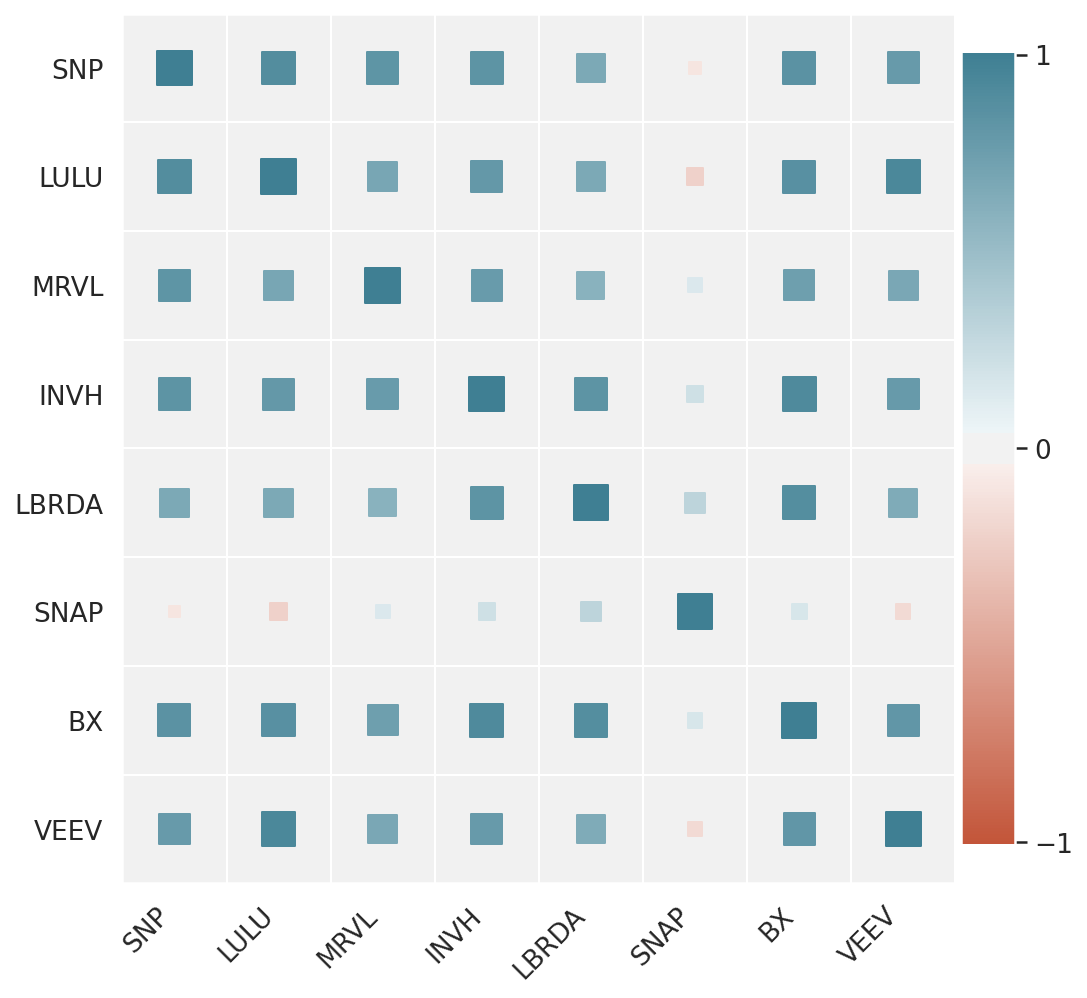

In [21]:
plt.figure(figsize=(8, 8))
corrplot(corr, size_scale=300);

**Plot the correlation relation between S&P feature and the other companies:**



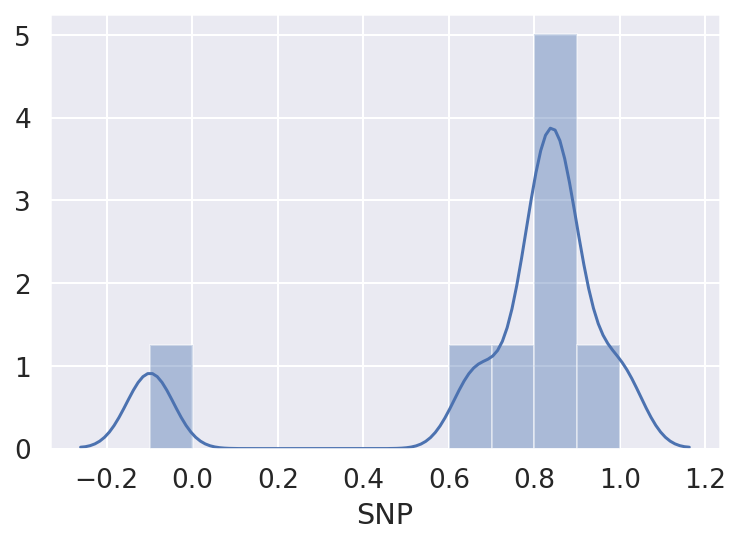

In [22]:
sns.distplot(corr.iloc[0])

it`s apper that the correlation value between S&P close and the other companies center about 0.8 and that make sense from correlation matrix

In [0]:
#sns.pairplot(corr)

***Conclusion:***

this companies LULU , MRVL ,INVH ,LBRDA ,BX, VEEV  correlate **postively** with snp, but SNAP comapny correlate **Negatively** with snp.

Thanks

Best Regards